In [1]:
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
cartella = r'../file/Data_Challenge_PHM2023_validation_data'
#dentro deve prende e apri tutti i file, controllare il nome e a seconda di questo fare delle azioni e salvare su un altro file
# Inizializza un DataFrame vuoto per salvare i risultati
risultati = pd.DataFrame(columns=['acc_X', 'acc_Y', 'acc_Z', "tachimetro"])
codici_6sec = ["V300_", "V400_", "V500_", "V600_", "V700_", "V800_", "V900_", "V1000_"]

# Loop attraverso tutti i file nella cartella
for filename in os.listdir(cartella):
    # Costruisci il percorso completo del file
    percorso_file = os.path.join(cartella, filename)
    df = pd.read_csv(percorso_file, delim_whitespace=True, header=None)
    #tachimetro indica 1 quando albero di carico fa un giro
    nuovi_nomi_colonne = ['acc_X', 'acc_Y', 'acc_Z', "tachimetro"]
    df.columns = nuovi_nomi_colonne
    
    # Esegui azioni basate sul nome del file
    if "V100_" in filename or "V200_" in filename:
        # Esegui azioni specifiche per la condizione 1
        risultati = df[150000:210000]
    elif any(codice in filename for codice in codici_6sec):
        # Esegui azioni specifiche per la condizione 2
        risultati = df[40000:100000]
    else:
        # Esegui azioni predefinite per gli altri casi
        risultati = df[:60000]

    # Salva il DataFrame con i risultati su un nuovo file
    risultati.to_csv(f'../file_cut_validation/{filename[:-4]}_cut.csv', index=False)

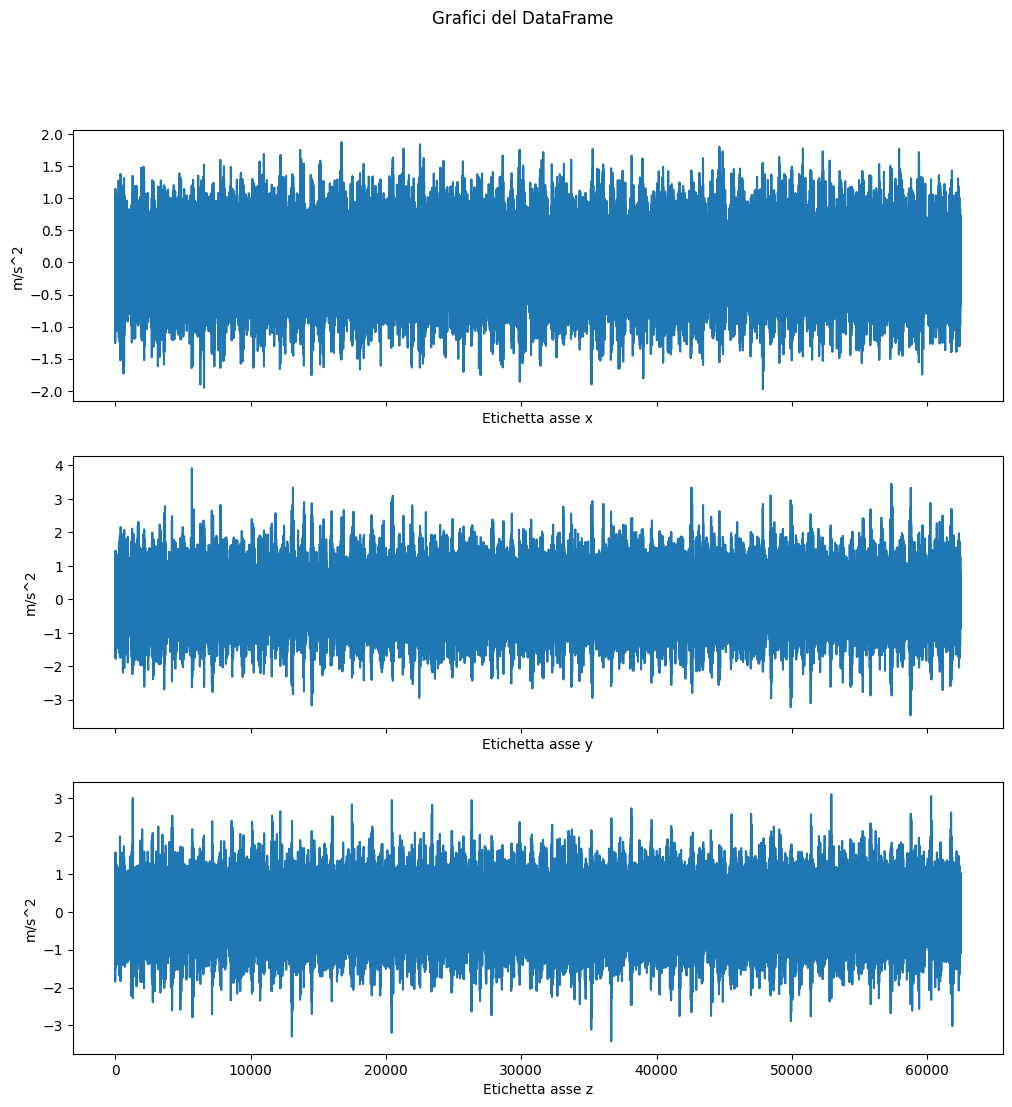

In [4]:
# Creare i sottografici
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(12, 12))

# Tracciare i dati su ciascun sottografo
ax[0].plot(df['acc_X'])
ax[1].plot(df['acc_Y'])
ax[2].plot(df['acc_Z'])

# Aggiungere etichette e titoli
ax[0].set_xlabel('Etichetta asse x')
ax[1].set_xlabel('Etichetta asse y')
ax[2].set_xlabel('Etichetta asse z')
ax[0].set_ylabel('m/s^2')
ax[1].set_ylabel('m/s^2')
ax[2].set_ylabel('m/s^2')
fig.suptitle('Grafici del DataFrame')

# Mostrare il grafico
plt.show()